In [1]:
import numpy as np

In [4]:
data =np.load('results/Debug/results/Debug/sv_test_01/inputs.npy',allow_pickle=True)
channel1 = data[:, 0:1, :, :]
channel2 = data[:, 1:2, :, :]
channel3 = data[:, 2:3, :, :]

FileNotFoundError: [Errno 2] No such file or directory: 'results/Debug/results/Debug/sv_test_01/inputs.npy'

In [ ]:
pred =np.load('results/Debug/results/Debug/sv_test_01/preds.npy',allow_pickle=True)
true =np.load('results/Debug/results/Debug/sv_test_01/trues.npy',allow_pickle=True)

In [2]:
from normalize import zscore_normalizations
from API.dataloader_sevir import normalize

In [3]:
def normalize_them(x, scale, offset, reverse=False):
    """
    Normalize data or reverse normalization
    :param x: data array
    :param scale: const scaling value
    :param offset: const offset value
    :param reverse: boolean undo normalization
    :return: normalized x array
    """
    if reverse:
        return x / scale - offset #actually +
    else:
        return (x+offset) * scale #actualliy -

In [4]:
def unNormalize(separated_tensors):
    normalize_x = [zscore_normalizations['ir069'], zscore_normalizations['ir107'], zscore_normalizations['vis']]
    tensor = []

    for i in range(len(separated_tensors)):
        tensor.append(normalize_them(separated_tensors[i], normalize_x[i][0], normalize_x[i][1], reverse=True))

    return tensor

In [11]:
def unNormalize_y(tensors, mode):
    if mode == '01':
        res = normalize_them(tensors, 1/255,0,reverse=True)
        return res
    else:
        normalize_y= [zscore_normalizations['vil']]
        res = normalize_them(tensors, normalize_y[0][0] , normalize_y[0][1], reverse= True)
        return res

In [11]:
separated_tensors = []

separated_tensors.append(channel1)
separated_tensors.append(channel2)
separated_tensors.append(channel3)
unNormalized_tensors = unNormalize(separated_tensors)

NameError: name 'channel1' is not defined

In [ ]:
print(pred.shape)
print(unNormalized_tensors[0].shape)

In [ ]:
from display import get_cmap
import matplotlib.pyplot as plt


# Define indices
indices = [0,3,5,7,9,10,14,15,16,19]

# Define colormap dictionary function
cmap_dict = lambda s: {'cmap':get_cmap(s,encoded=True)[0], 'norm':get_cmap(s,encoded=True)[1],
                       'vmin':get_cmap(s,encoded=True)[2], 'vmax':get_cmap(s,encoded=True)[3]}

vis_cmap, vis_norm, vis_vmin, vis_vmax = get_cmap('vis',encoded=True)

# Define value for 'a'
a = 500

# Plotting
fig, axs = plt.subplots(len(indices), 5, figsize=(8, len(indices) * 2))
for axi, i in enumerate(indices):
    axs[axi, 0].imshow(unNormalized_tensors[0][i,0,:,:], **cmap_dict('ir069') )
    axs[axi, 1].imshow(unNormalized_tensors[1][i,0,:,:], **cmap_dict('ir107') )
    axs[axi, 2].imshow(unNormalized_tensors[2][i,0,:,:], cmap='gray', vmin=vis_vmin, vmax=vis_vmax)
    axs[axi, 3].imshow(pred[i,0,:,:], **cmap_dict('vil') )
    axs[axi, 4].imshow(true[i,0,:,:], **cmap_dict('vil') )

for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.setp(axs[-1, 0], xlabel='input (ir069)')
plt.setp(axs[-1, 1], xlabel='input (ir107)')
plt.setp(axs[-1, 2], xlabel='input (vis)')
plt.setp(axs[-1, 3], xlabel='prob. prediction')
plt.setp(axs[-1, 4], xlabel='target')

plt.tight_layout()
plt.show()

#### coments on results
#sv_main_02 is only X normalized 

#SV_main_03 is both X and Y normalized

#Above results tested when the optimizer was wronly optimizing the inference model so the error is there and high loss .

#new sv (to be named sv_main_04_test_01) is only simvp model and only radar data is sent as X which is not normalized by any scale. 

#new sv(to be named sv_main_04_test_02) is only simvp model and only radar data is sent as X which is not normalized by any scale, trying to add mcsi ,metrics over it


In [8]:
data =np.load('results/Debug/results/Debug/sv_main_05_test_01/inputs.npy',allow_pickle=True)
pred =np.load('results/Debug/results/Debug/sv_main_05_test_01/preds.npy',allow_pickle=True)
true =np.load('results/Debug/results/Debug/sv_main_05_test_01/trues.npy',allow_pickle=True)

In [9]:
print(data.shape)
print(pred.shape)
print(true.shape)

(372, 13, 1, 384, 384)
(372, 12, 1, 384, 384)
(372, 12, 1, 384, 384)


In [8]:
channel1 = data[:,:, 0:1, :, :]
channel2 = data[:,:, 1:2, :, :]
channel3 = data[:,:, 2:3, :, :]

In [9]:
separated_tensors = []

separated_tensors.append(channel1)
separated_tensors.append(channel2)
separated_tensors.append(channel3)
# unNormalized_tensors = unNormalize(separated_tensors)
unNormalized_tensors = separated_tensors

In [11]:
unNormalized_tensors = unNormalize(separated_tensors)

In [11]:
# pred = unNormalize_y(pred)
true = unNormalize_y(true)

In [12]:
pred = unNormalize_y(pred)

In [13]:
print(pred.shape)

(66, 12, 1, 384, 384)


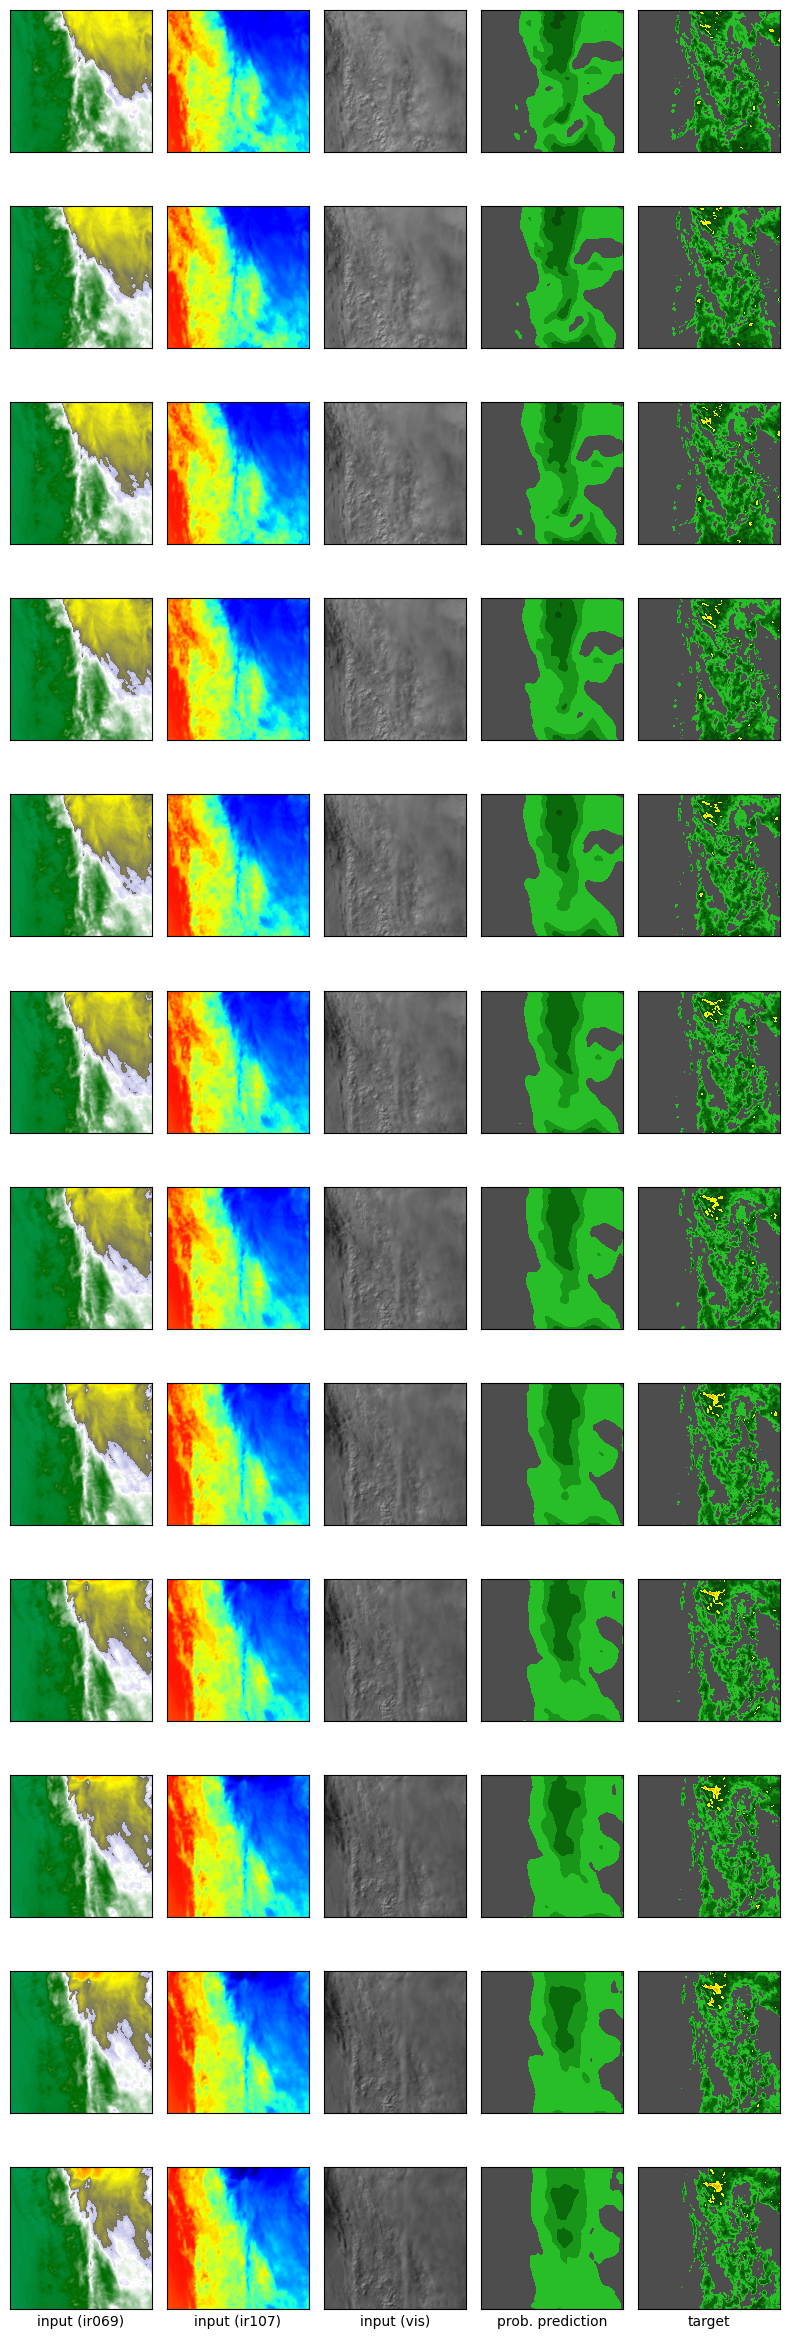

In [22]:
from display import get_cmap
import matplotlib.pyplot as plt


# Define indices
indices = [0,1,2,3,4,5,6,7,8,9,10,11]

# Define colormap dictionary function
cmap_dict = lambda s: {'cmap':get_cmap(s,encoded=True)[0], 'norm':get_cmap(s,encoded=True)[1],
                       'vmin':get_cmap(s,encoded=True)[2], 'vmax':get_cmap(s,encoded=True)[3]}

vis_cmap, vis_norm, vis_vmin, vis_vmax = get_cmap('vis',encoded=True)

# Define value for 'a'
a = 71
# Plotting
fig, axs = plt.subplots(len(indices), 5, figsize=(8, len(indices) * 2))
for axi, i in enumerate(indices):
    axs[axi, 0].imshow(unNormalized_tensors[0][a,i,0,:,:], **cmap_dict('ir069') )
    axs[axi, 1].imshow(unNormalized_tensors[1][a,i,0,:,:], **cmap_dict('ir107') )
    axs[axi, 2].imshow(unNormalized_tensors[2][a,i,0,:,:], cmap='gray', vmin=vis_vmin, vmax=vis_vmax)
    axs[axi, 3].imshow(pred[a,i,0,:,:], **cmap_dict('vil') )
    axs[axi, 4].imshow(true[a,i,0,:,:], **cmap_dict('vil') )

for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.setp(axs[-1, 0], xlabel='input (ir069)')
plt.setp(axs[-1, 1], xlabel='input (ir107)')
plt.setp(axs[-1, 2], xlabel='input (vis)')
plt.setp(axs[-1, 3], xlabel='prob. prediction')
plt.setp(axs[-1, 4], xlabel='target')

plt.tight_layout()
plt.show()

In [22]:
print(pred[a,i,0,:,:])
print(true[a,i,0,:,:])

[[33.500378 27.629095 25.263592 ... 15.907858 31.336433 31.747446]
 [45.956318 33.24557  25.637745 ... 25.62951  23.973478 34.833496]
 [47.527214 32.594788 31.786804 ... 18.627508 29.7011   28.42838 ]
 ...
 [47.0961   29.979662 34.017826 ... 25.348438 26.692455 31.545965]
 [57.287674 28.294338 21.357185 ... 20.353823 27.09041  27.94208 ]
 [56.844326 37.11674  37.73268  ... 34.713223 32.035763 37.191277]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 79. 74. 79.]
 [ 0.  0.  0. ... 73. 74. 77.]
 [ 0.  0.  0. ... 69. 73. 74.]]


In [20]:
pred2 = np.load('results/Debug/results/Debug/sv/preds.npy',allow_pickle=True)
true2 =np.load('results/Debug/results/Debug/sv/trues.npy',allow_pickle=True)

In [21]:
print(pred2[a,i,0,:,:])
print(true2[a,i,0,:,:])

[[ 0.07639705  0.18334816  0.00437254 ...  0.04650629  0.05593138
   0.02095514]
 [ 0.3311562   0.22556143  0.4318896  ...  0.12248749  0.10517249
   0.16799754]
 [ 0.43313885 -0.00721192  0.17668046 ...  0.00988043  0.11965901
  -0.02645843]
 ...
 [-0.01012035  0.07951032  0.30159456 ...  0.2209154   0.3089695
   0.2052419 ]
 [ 0.16634583  0.08517126  0.12904473 ...  0.14247863  0.20417833
   0.08747401]
 [ 0.08080895  0.01527768  0.04113184 ...  0.04249695 -0.0407107
   0.0761929 ]]
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 79. 74. 79.]
 [ 0.  0.  0. ... 73. 74. 77.]
 [ 0.  0.  0. ... 69. 73. 74.]]


#### Testing with server normalized data (lower losses)

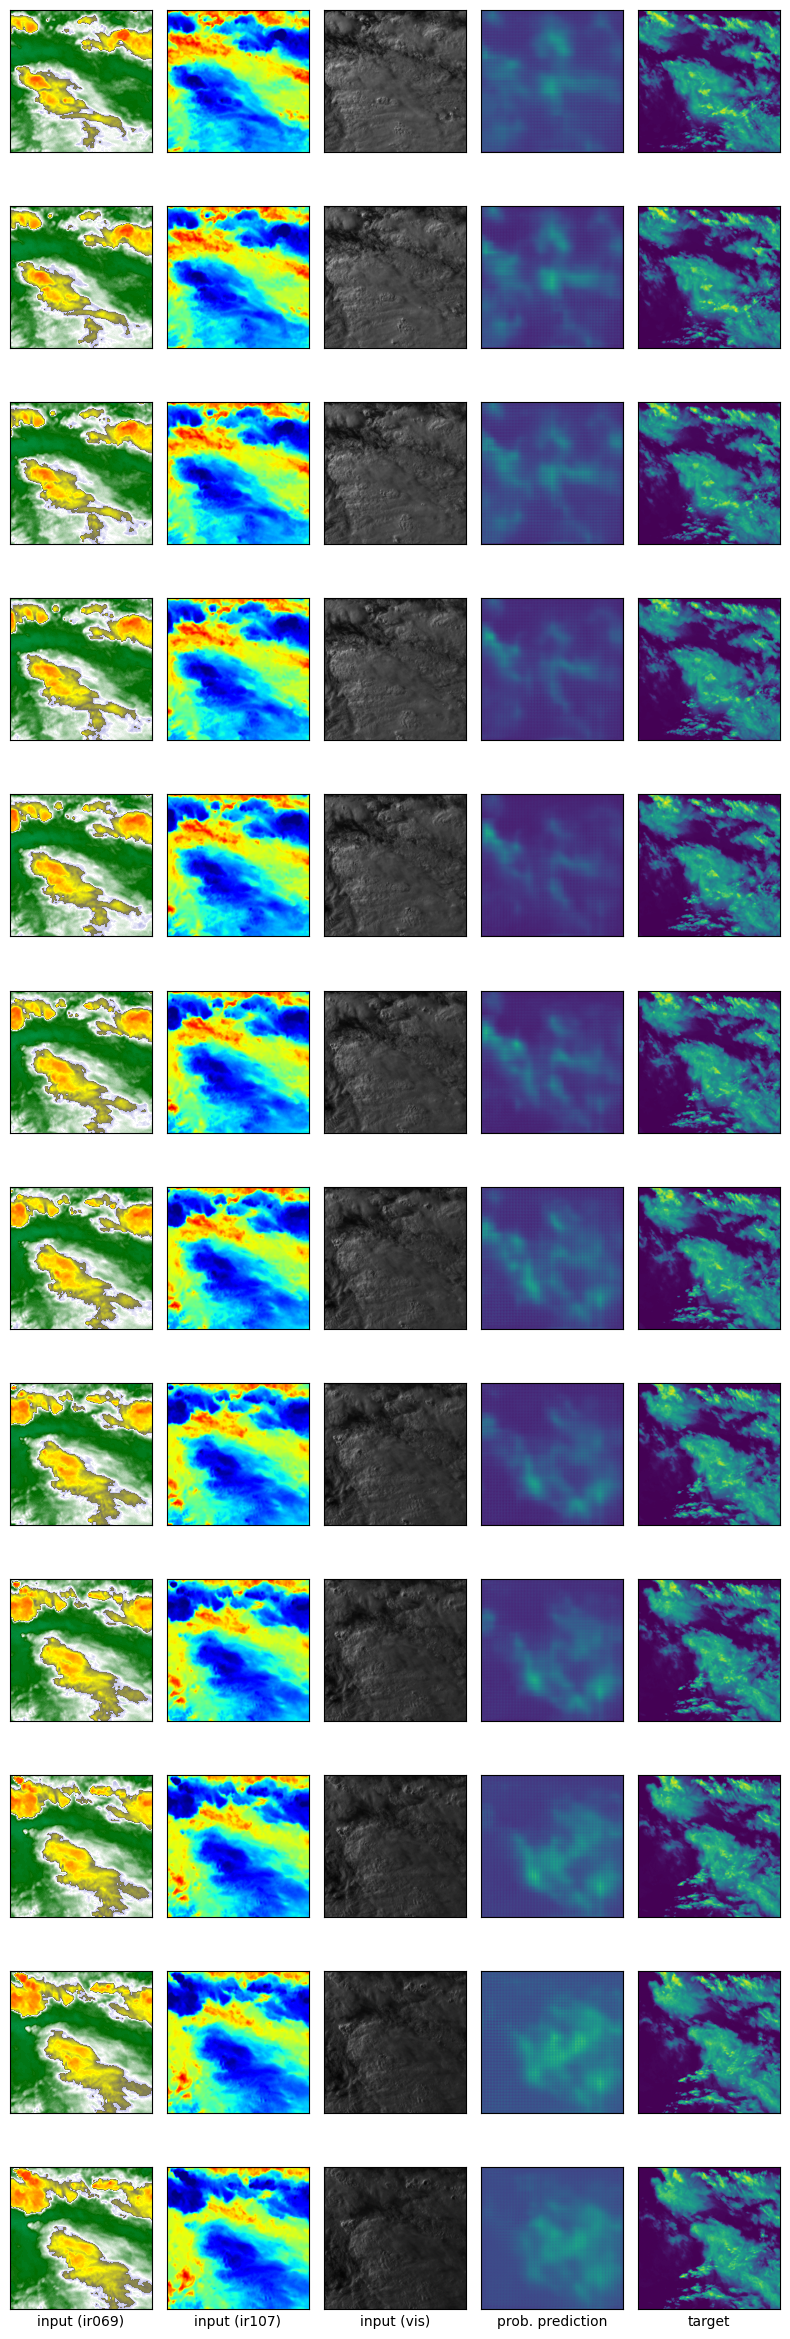

In [13]:
from display import get_cmap
import matplotlib.pyplot as plt


# Define indices
indices = [0,1,2,3,4,5,6,7,8,9,10,11]

# Define colormap dictionary function
cmap_dict = lambda s: {'cmap':get_cmap(s,encoded=True)[0], 'norm':get_cmap(s,encoded=True)[1],
                       'vmin':get_cmap(s,encoded=True)[2], 'vmax':get_cmap(s,encoded=True)[3]}

vis_cmap, vis_norm, vis_vmin, vis_vmax = get_cmap('vis',encoded=True)

# Define value for 'a'
a = 51

# Plotting
fig, axs = plt.subplots(len(indices), 5, figsize=(8, len(indices) * 2))
for axi, i in enumerate(indices):
    axs[axi, 0].imshow(unNormalized_tensors[0][a,i,0,:,:], **cmap_dict('ir069') )
    axs[axi, 1].imshow(unNormalized_tensors[1][a,i,0,:,:], **cmap_dict('ir107') )
    axs[axi, 2].imshow(unNormalized_tensors[2][a,i,0,:,:], cmap='gray', vmin=vis_vmin, vmax=vis_vmax)
    axs[axi, 3].imshow(pred[a,i,0,:,:], )
    axs[axi, 4].imshow(true[a,i,0,:,:], )

for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.setp(axs[-1, 0], xlabel='input (ir069)')
plt.setp(axs[-1, 1], xlabel='input (ir107)')
plt.setp(axs[-1, 2], xlabel='input (vis)')
plt.setp(axs[-1, 3], xlabel='prob. prediction')
plt.setp(axs[-1, 4], xlabel='target')

plt.tight_layout()
plt.show()

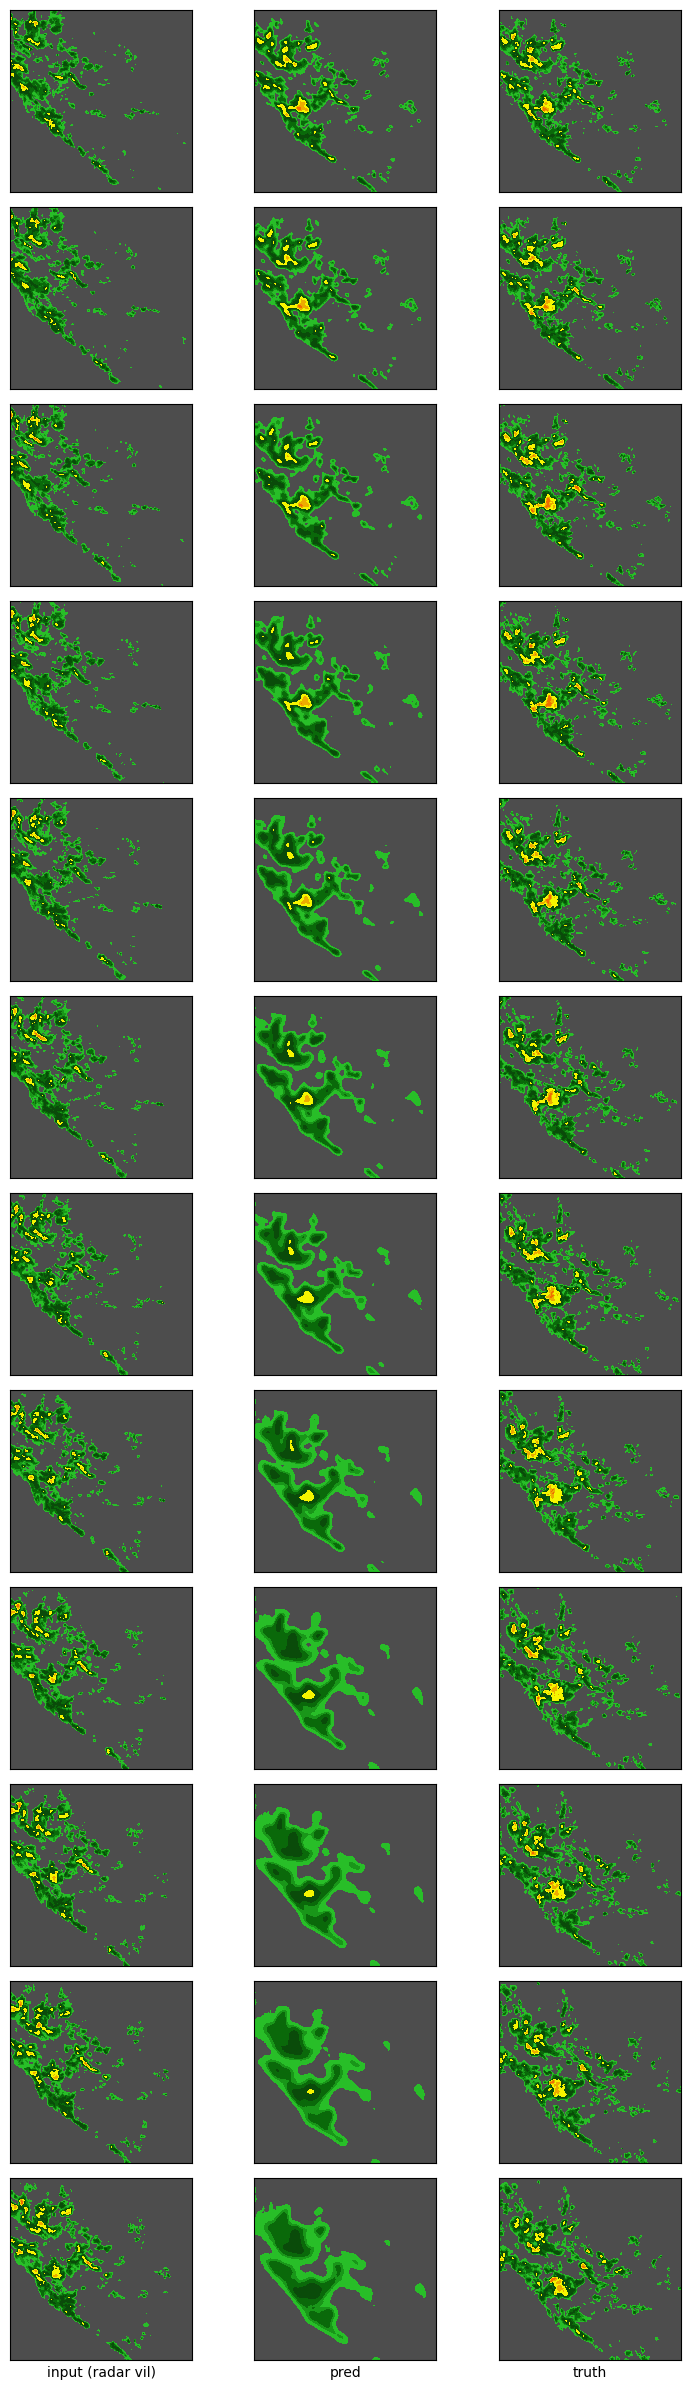

In [16]:
from display import get_cmap
import matplotlib.pyplot as plt


# Define indices
indices = [0,1,2,3,4,5,6,7,8,9,10,11]

# Define colormap dictionary function
cmap_dict = lambda s: {'cmap':get_cmap(s,encoded=True)[0], 'norm':get_cmap(s,encoded=True)[1],
                       'vmin':get_cmap(s,encoded=True)[2], 'vmax':get_cmap(s,encoded=True)[3]}

vis_cmap, vis_norm, vis_vmin, vis_vmax = get_cmap('vis',encoded=True)

# Define value for 'a'
# a = 51
a=930

# Plotting
fig, axs = plt.subplots(len(indices), 3, figsize=(8, len(indices) * 2))
for axi, i in enumerate(indices):
    axs[axi, 0].imshow(data[a,i,0,:,:], **cmap_dict('vil') )
    axs[axi, 1].imshow(pred[a,i,0,:,:], **cmap_dict('vil'))
    axs[axi, 2].imshow(true[a,i,0,:,:], **cmap_dict('vil'))


for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.setp(axs[-1, 0], xlabel='input (radar vil)')
plt.setp(axs[-1, 1], xlabel='pred')
plt.setp(axs[-1, 2], xlabel='truth')
# plt.setp(axs[-1, 3], xlabel='prob. prediction')
# plt.setp(axs[-1, 4], xlabel='target')

plt.tight_layout()
plt.show()

In [12]:
data =unNormalize_y(data, mode ='01')
pred =unNormalize_y(pred, mode='01')
true = unNormalize_y(true,mode ='01')

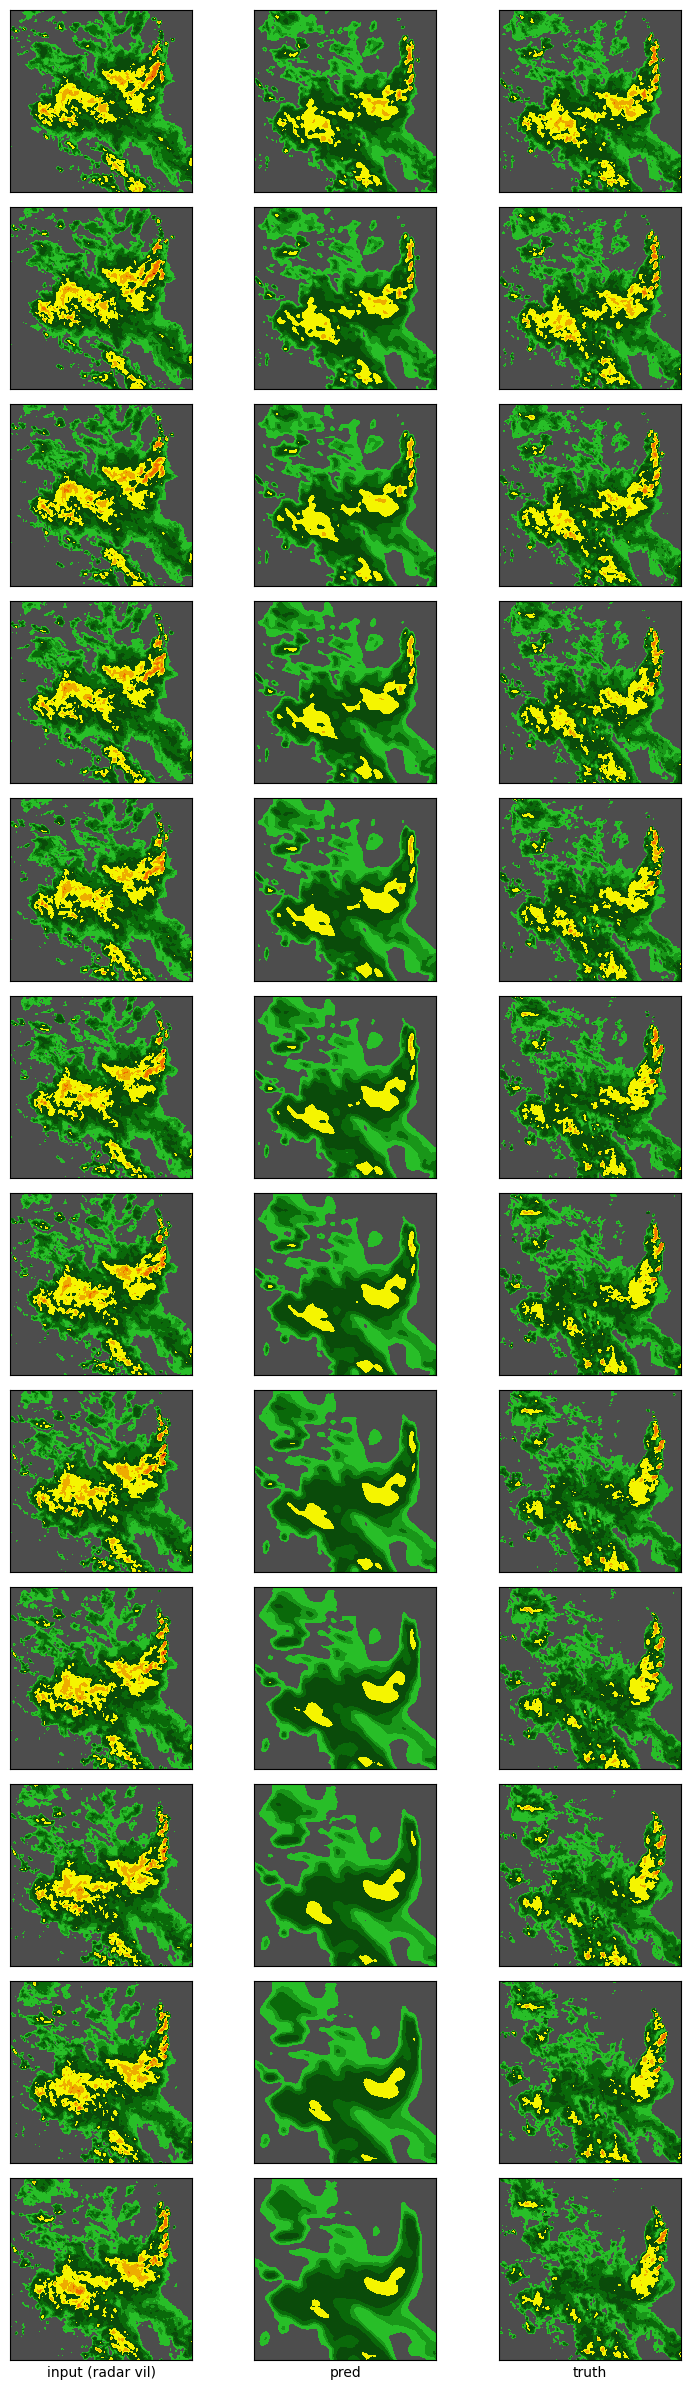

In [15]:
from display import get_cmap
import matplotlib.pyplot as plt


# Define indices
indices = [0,1,2,3,4,5,6,7,8,9,10,11]

# Define colormap dictionary function
cmap_dict = lambda s: {'cmap':get_cmap(s,encoded=True)[0], 'norm':get_cmap(s,encoded=True)[1],
                       'vmin':get_cmap(s,encoded=True)[2], 'vmax':get_cmap(s,encoded=True)[3]}

vis_cmap, vis_norm, vis_vmin, vis_vmax = get_cmap('vis',encoded=True)

# Define value for 'a'
# a = 51
# a=930
a= 350

# Plotting
fig, axs = plt.subplots(len(indices), 3, figsize=(8, len(indices) * 2))
for axi, i in enumerate(indices):
    axs[axi, 0].imshow(data[a,i,0,:,:], **cmap_dict('vil') )
    axs[axi, 1].imshow(pred[a,i,0,:,:], **cmap_dict('vil'))
    axs[axi, 2].imshow(true[a,i,0,:,:], **cmap_dict('vil'))


for ax in axs.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.setp(axs[-1, 0], xlabel='input (radar vil)')
plt.setp(axs[-1, 1], xlabel='pred')
plt.setp(axs[-1, 2], xlabel='truth')
# plt.setp(axs[-1, 3], xlabel='prob. prediction')
# plt.setp(axs[-1, 4], xlabel='target')

plt.tight_layout()
plt.show()

In [1]:

from omegaconf import OmegaConf
from API.sevir_torch_wrap import get_sevir_datamodule

config_path =  "API/sevir_v1.yaml"  # Change to your project path
oc_from_file = OmegaConf.load(open(config_path, "r"))
dataset_oc = OmegaConf.to_object(oc_from_file.dataset)

dm = get_sevir_datamodule(
        dataset_oc=dataset_oc,
        num_workers=8,)
dm.prepare_data() # Check if SEVIR dataset is available
dm.setup() # Preprocess train/val/test data set

train_data_loader = dm.train_dataloader()
val_data_loader = dm.val_dataloader()
test_data_loader = dm.test_dataloader()
print("data loading completed")

                   id                                          file_name  \
0     R17062009557490  vil/2017/SEVIR_VIL_RANDOMEVENTS_2017_0501_0831.h5   
1     R17061817478220  vil/2017/SEVIR_VIL_RANDOMEVENTS_2017_0501_0831.h5   
2             S710670   vil/2017/SEVIR_VIL_STORMEVENTS_2017_0101_0630.h5   
3             S709923   vil/2017/SEVIR_VIL_STORMEVENTS_2017_0101_0630.h5   
4     R17061415278179  vil/2017/SEVIR_VIL_RANDOMEVENTS_2017_0501_0831.h5   
...               ...                                                ...   
2034  R19112113018158  vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0901_1231.h5   
2035  R19110704477753  vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0901_1231.h5   
2036  R19111813347759  vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0901_1231.h5   
2037  R19112421488513  vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0901_1231.h5   
2038  R19111205357592  vil/2019/SEVIR_VIL_RANDOMEVENTS_2019_0901_1231.h5   

      file_index img_type            time_utc  \
0            451      vil 2017-06-20 0

In [8]:
print(train_data_loader.dataset[0]['vil'][1])

tensor([[[[0.0118, 0.0118, 0.0118,  ..., 0.0118, 0.0157, 0.0157],
          [0.0118, 0.0118, 0.0118,  ..., 0.0118, 0.0157, 0.0157],
          [0.0118, 0.0118, 0.0118,  ..., 0.0157, 0.0157, 0.0157],
          ...,
          [0.0549, 0.0314, 0.0078,  ..., 0.0000, 0.0000, 0.0000],
          [0.1412, 0.0314, 0.0078,  ..., 0.0000, 0.0000, 0.0000],
          [0.0784, 0.0275, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0118, 0.0118, 0.0118,  ..., 0.0118, 0.0118, 0.0157],
          [0.0118, 0.0118, 0.0118,  ..., 0.0078, 0.0118, 0.0118],
          [0.0078, 0.0118, 0.0118,  ..., 0.0078, 0.0118, 0.0118],
          ...,
          [0.3529, 0.3529, 0.3255,  ..., 0.0000, 0.0000, 0.0000],
          [0.3255, 0.3216, 0.2510,  ..., 0.0000, 0.0000, 0.0000],
          [0.2314, 0.1765, 0.1686,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0118, 0.0118, 0.0118,  ..., 0.0118, 0.0157, 0.0157],
          [0.0118, 0.0078, 0.0078,  ..., 0.0118, 0.0157, 0.0157],
          [0.0118, 0.0078, 0.0078,  ..